In [133]:
import datetime as dt
import pandas as pd
import numpy as np
pd.set_option('max_colwidth', 200)
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
import re
import matplotlib.pyplot as plt
%matplotlib inline

plt.style.use('ggplot')

In [71]:
data= pd.read_excel('Sales_Ops_Sample_Data_(1).xlsx')

In [72]:
data.head(5)

,Customer placed order datetime,Placed order with restaurant datetime,Driver at restaurant datetime,Delivered to consumer datetime,Driver ID,Restaurant ID,Consumer ID,Is New,Delivery Region,Is ASAP,Order total,Amount of discount,Amount of tip,Refunded amount
0,14 20:27:45,14 20:29:41,14 20:39:32,14 20:52:03,86,12,5,False,Palo Alto,True,20.45,20.45,3.07,0.0
1,07 20:16:28,07 20:17:32,07 20:36:00,07 20:49:02,325,66,5,False,Palo Alto,True,40.62,40.62,3.73,0.0
2,13 19:35:09,13 19:39:26,13 20:28:16,13 20:52:44,200,124,5,False,Palo Alto,True,37.78,37.78,1.89,0.0
3,22 19:47:53,22 19:56:08,22 20:01:20,22 20:18:01,154,5,14,False,Palo Alto,True,39.66,0.00,1.98,0.0
4,03 19:01:52,03 19:09:08,03 19:36:20,03 19:45:26,332,9,14,False,Palo Alto,True,39.66,0.00,5.95,0.0


In [15]:
data['Customer placed order datetime'].str[:3].head(5)

0    14 
1    07 
2    13 
3    22 
4    03 
Name: Customer placed order datetime, dtype: object

In [19]:
pd.to_timedelta(data['Customer placed order datetime'].str[3:]).head(5)

0   20:27:45
1   20:16:28
2   19:35:09
3   19:47:53
4   19:01:52
Name: Customer placed order datetime, dtype: timedelta64[ns]

In [27]:
(pd.to_datetime(data['Delivered to consumer datetime'].str[3:]).dt.minute - pd.to_datetime(data['Customer placed order datetime'].str[3:]).dt.minute).head(10) 

0    25
1    33
2    17
3   -29
4    44
5   -25
6   -20
7     4
8   -31
9    46
dtype: int64

In [155]:
data['Date1_day'] = data['Delivered to consumer datetime'].str.slice(start=0, stop=3)
data['Date2_day'] = data['Customer placed order datetime'].str.slice(start=0, stop=3)
data['Date1'] = pd.to_datetime(data['Delivered to consumer datetime'].str.slice(start=3))
data['Date2'] = pd.to_datetime(data['Customer placed order datetime'].str.slice(start=3))

data['Total_Delivery_Time(mins)'] = np.where(data['Date1_day'] == data['Date2_day'],
                            data['Date1'] - data['Date2'],
                            np.NaN)

data.drop(['Date1','Date2','Date1_day', 'Date2_day'], axis=1, inplace=True)
data['Total_Delivery_Time(mins)'] = data['Total_Delivery_Time(mins)'] / np.timedelta64(1,'m')

In [146]:
# def diff_func(x):
#     cust_time = pd.to_datetime(x['Delivered to consumer datetime'], format='%d %H:%M:%S')
#     del_time = pd.to_datetime(x['Customer placed order datetime'], format='%d %H:%M:%S')
#     if cust_time.day == del_time.day:
#         return del_time.minute - cust_time.minute
#     else:
#         return None

# data['Total_Delivery_Time(mins)'] = data.apply(diff_func, axis=1)
#data['Total_Delivery_Time(mins)'] = abs(data['Total_Delivery_Time(mins)'])

In [163]:
data['Total_after_disc'] = data['Order total'] - data['Amount of discount']

In [481]:
data[data['Amount of discount']>0]['Delivery Region'].value_counts()

Palo Alto        1443
San Jose          841
Mountain View     504
Name: Delivery Region, dtype: int64

In [166]:
#Average Order Total
round(data['Total_after_disc'].mean(), 2)

49.9

In [157]:
# Average Total Delivery Time in Mins
round(abs(data['Total_Delivery_Time(mins)'].mean()), 2)

57.02

In [158]:
round(100*data['Delivery Region'].value_counts(normalize=True),2)

Palo Alto        63.24
Mountain View    20.80
San Jose         15.81
None              0.14
Name: Delivery Region, dtype: float64

In [159]:
#Avg delivery times for each City/Region
round(data.groupby('Delivery Region')['Total_Delivery_Time(mins)'].mean(),2)

Delivery Region
Mountain View     56.00
None             269.89
Palo Alto         57.42
San Jose          54.76
Name: Total_Delivery_Time(mins), dtype: float64

In [160]:
round(data.groupby('Delivery Region')['Total_Delivery_Time(mins)'].mean(),2).idxmax(),\
round(data.groupby('Delivery Region')['Total_Delivery_Time(mins)'].mean(),2).max()

('None', 269.89)

In [167]:
data.describe()

,Driver ID,Restaurant ID,Consumer ID,Order total,Amount of discount,Amount of tip,Refunded amount,Total_Delivery_Time(mins),Total_after_disc
count,18078.000000,18078.000000,18078.000000,18078.000000,18078.000000,18078.000000,18078.000000,16305.000000,18078.000000
mean,222.448169,108.721263,32010.313475,51.261496,1.356706,3.492022,0.612091,57.023757,49.904790
std,105.219194,98.609766,42010.215766,50.599675,6.516667,3.700115,6.073104,63.393334,50.765906
min,7.000000,2.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.466667,0.000000
25%,141.000000,23.000000,4243.500000,26.660000,0.000000,1.400000,0.000000,36.566667,25.550000
50%,227.000000,77.000000,10972.000000,38.630000,0.000000,2.550000,0.000000,46.783333,37.480000
75%,314.000000,186.000000,56857.000000,57.885000,0.000000,4.460000,0.000000,61.566667,56.565000
max,438.000000,409.000000,200449.000000,1604.130000,187.880000,120.300000,414.770000,1209.966667,1604.130000


In [173]:
round(data.groupby(['Delivery Region']).agg({'Consumer ID': 'count','Total_Delivery_Time(mins)':'mean','Total_after_disc':'mean'
                                            ,'Amount of discount':'mean'}).sort_values(by='Consumer ID', ascending=False),2)

,Consumer ID,Total_Delivery_Time(mins),Total_after_disc,Amount of discount
Delivery Region,,,,
Palo Alto,11433,57.42,51.16,1.32
Mountain View,3760,56.00,51.02,1.05
San Jose,2859,54.76,41.83,1.91
None,26,269.89,224.36,0.00


In [110]:
#Customers with the most orders
data.groupby('Consumer ID').agg({'Consumer ID': 'count'}).sort_values(by='Consumer ID', ascending=False)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: 'Consumer ID' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version
  """Entry point for launching an IPython kernel.


,Consumer ID
Consumer ID,
514,66
929,50
11956,47
2469,43
4087,39
2435,37
22183,36
8000,35
6245,33


# FRAUD ANALYSIS

In [468]:
data.pivot_table('Consumer ID', index='Is New', columns='Delivery Region', aggfunc='count')

Delivery Region,Mountain View,None,Palo Alto,San Jose
Is New,,,,
False,3040,23,9310,2193
True,720,3,2123,666


In [339]:
data[data['Is New']==True].groupby('Delivery Region')['Consumer ID'].count()

Delivery Region
Mountain View     720
None                3
Palo Alto        2123
San Jose          666
Name: Consumer ID, dtype: int64

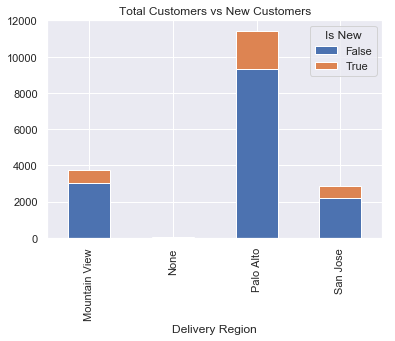

In [480]:
data.groupby(['Delivery Region','Is New'])['Consumer ID'].size().unstack().plot(kind='bar',stacked=True)
plt.title('Total Customers vs New Customers')
plt.show()

In [363]:
data.head(3)

,Customer placed order datetime,Placed order with restaurant datetime,Driver at restaurant datetime,Delivered to consumer datetime,Driver ID,Restaurant ID,Consumer ID,Is New,Delivery Region,Is ASAP,Order total,Amount of discount,Amount of tip,Refunded amount,Total_Delivery_Time(mins),Total_after_disc,is_new_counts
0,14 20:27:45,14 20:29:41,14 20:39:32,14 20:52:03,86,12,5,False,Palo Alto,True,20.45,20.45,3.07,0.0,24.300000,0.0,1.0
1,07 20:16:28,07 20:17:32,07 20:36:00,07 20:49:02,325,66,5,False,Palo Alto,True,40.62,40.62,3.73,0.0,32.566667,0.0,1.0
2,13 19:35:09,13 19:39:26,13 20:28:16,13 20:52:44,200,124,5,False,Palo Alto,True,37.78,37.78,1.89,0.0,77.583333,0.0,1.0


In [329]:
#Create column to count the number of times a Customer's "Is New" value = True
df = data[data['Is New']==True].groupby('Delivery Region')['Consumer ID'].value_counts().loc[lambda x : x>1].reset_index(name='count')[['Consumer ID', 'count']]
dic_vals= pd.Series(df['count'].values, index=df['Consumer ID']).to_dict()
data['is_new_counts'] = data["Consumer ID"].map(dic_vals, na_action= 1).fillna(1)

In [431]:
# First time customer orders DISCREPANCIES - BIGGEST OFFENDERS
data[data['Is New']==True].groupby('Delivery Region')['Consumer ID'].value_counts().loc[lambda x : x>1].reset_index(name='count').sort_values(by=['count'], \
ascending=False).head(30)

,Delivery Region,Consumer ID,count
136,Palo Alto,514,12
0,Mountain View,2469,9
137,Palo Alto,9798,9
139,Palo Alto,78977,7
138,Palo Alto,459,7
536,San Jose,79259,6
535,San Jose,56015,6
148,Palo Alto,71801,6
147,Palo Alto,48744,6
146,Palo Alto,13018,6


In [378]:
def more_than_one(group):
    return all(group['Consumer ID'].value_counts() > 1)

first_time_order_fraud = data[data['Is New']==True].groupby('Consumer ID').filter(more_than_one)
first_time_order_fraud.sort_values(by=['Consumer ID'])

,Customer placed order datetime,Placed order with restaurant datetime,Driver at restaurant datetime,Delivered to consumer datetime,Driver ID,Restaurant ID,Consumer ID,Is New,Delivery Region,Is ASAP,Order total,Amount of discount,Amount of tip,Refunded amount,Total_Delivery_Time(mins),Total_after_disc,is_new_counts,Possible_Fraud
15,03 02:31:03,03 02:31:15,03 02:44:58,03 03:05:16,60,68,15,True,Palo Alto,True,49.88,0.00,2.01,0.00,34.216667,49.88,3.0,0
16,12 20:37:16,12 20:38:57,NaN,12 21:11:51,156,86,15,True,Palo Alto,True,25.68,0.00,0.90,0.00,34.583333,25.68,3.0,0
18,07 03:05:56,07 03:07:09,07 03:22:04,07 03:37:09,330,232,15,True,Palo Alto,True,64.18,0.00,2.67,0.00,31.216667,64.18,3.0,0
33,12 20:50:54,12 20:58:29,12 21:08:33,12 21:35:54,48,9,32,True,Palo Alto,True,35.91,0.00,5.39,0.00,45.000000,35.91,2.0,0
34,15 01:29:10,15 01:31:50,NaN,15 02:12:02,321,9,32,True,Palo Alto,True,43.52,0.00,7.00,0.00,42.866667,43.52,2.0,0
218,29 01:32:52,29 01:38:52,29 01:50:09,29 02:20:19,321,63,358,True,Palo Alto,True,31.39,0.00,2.33,0.00,47.450000,31.39,2.0,0
219,11 01:29:03,11 01:29:35,11 01:51:21,11 02:20:55,287,205,358,True,Palo Alto,True,23.29,0.00,1.59,0.00,51.866667,23.29,2.0,0
249,04 02:27:44,04 02:31:22,04 03:44:34,04 04:03:52,92,27,430,True,Palo Alto,True,47.33,0.00,1.90,0.00,96.133333,47.33,3.0,0
252,16 20:40:13,16 20:40:35,16 20:56:34,16 22:11:14,364,28,430,True,Palo Alto,True,44.99,0.00,1.79,0.00,91.016667,44.99,3.0,0
253,22 03:20:32,22 03:21:02,22 03:36:32,22 04:12:54,313,62,430,True,Palo Alto,True,46.78,0.00,1.87,0.00,52.366667,46.78,3.0,0


In [295]:
first_time_order_fraud.groupby(['Delivery Region']).agg({'Consumer ID':'count','Amount of discount':['sum', 'mean']})#.sort_values(by='Consumer ID', ascending=False)

Consumer ID Amount of discount          
                      count                sum      mean
Delivery Region                                         
Mountain View           398             223.18  0.560754
Palo Alto              1040            1053.70  1.013173
San Jose                300             271.00  0.903333

In [377]:
first_time_order_fraud[first_time_order_fraud['Amount of discount']>0].sort_values(by=['Consumer ID'])

,Customer placed order datetime,Placed order with restaurant datetime,Driver at restaurant datetime,Delivered to consumer datetime,Driver ID,Restaurant ID,Consumer ID,Is New,Delivery Region,Is ASAP,Order total,Amount of discount,Amount of tip,Refunded amount,Total_Delivery_Time(mins),Total_after_disc
310,21 02:46:02,21 02:55:53,21 03:05:36,21 03:22:22,259,97,497,True,Palo Alto,True,36.34,10.00,1.82,0.00,36.333333,26.34
362,06 19:20:32,06 19:23:52,06 19:34:13,06 19:52:09,222,124,514,True,Palo Alto,True,31.27,31.27,3.48,0.00,31.616667,0.00
361,02 20:11:09,02 20:15:32,02 20:24:13,02 20:42:16,90,123,514,True,Palo Alto,True,19.57,19.57,1.24,0.00,31.116667,0.00
354,13 03:47:04,13 03:51:15,13 03:58:34,13 04:10:49,43,72,514,True,Palo Alto,True,70.55,70.55,5.92,0.00,23.750000,0.00
352,14 20:47:37,14 20:47:55,14 21:19:38,14 21:29:37,48,68,514,True,Palo Alto,True,46.78,46.78,7.02,0.00,42.000000,0.00
351,16 20:11:12,16 20:12:09,16 20:19:44,16 20:40:44,364,66,514,True,Palo Alto,True,53.64,53.64,2.19,2.19,29.533333,0.00
367,15 03:40:04,15 03:42:22,15 04:05:45,15 04:28:00,313,232,514,True,Palo Alto,True,109.79,109.79,4.77,0.00,47.933333,0.00
346,29 03:20:13,29 03:20:30,29 03:33:03,29 03:44:19,314,48,514,True,Palo Alto,True,72.67,72.67,6.13,0.00,24.100000,0.00
344,10 20:26:56,10 20:27:37,10 20:54:51,10 21:18:21,43,26,514,True,Palo Alto,True,97.03,87.29,5.00,0.00,51.416667,9.74
339,17 03:39:24,17 03:41:02,17 03:45:54,17 04:05:21,262,18,514,True,Palo Alto,True,98.77,98.77,8.53,0.00,25.950000,0.00


In [479]:
# Customers with multiple "is_new"= True instances and who have received a discount
df_agg= first_time_order_fraud[first_time_order_fraud['Amount of discount']>0].groupby('Consumer ID').agg({'Consumer ID':'count', 'Amount of discount':['sum', 'mean'], \
'Order total':['sum', 'mean'],'Total_after_disc':['sum', 'mean']})

df_agg.columns = [' '.join(col) for col in df_agg.columns]
df_agg.sort_values(by='Consumer ID count', ascending=False).loc[df_agg['Consumer ID count'] > 1]

,Consumer ID count,Amount of discount sum,Amount of discount mean,Order total sum,Order total mean,Total_after_disc sum,Total_after_disc mean
Consumer ID,,,,,,,
514,12,827.15,68.929167,836.89,69.740833,9.74,0.811667
81147,2,16.00,8.000000,66.28,33.140000,50.28,25.140000
110118,2,16.00,8.000000,42.45,21.225000,26.45,13.225000


In [375]:
#Add Possible Fraud Column
data['Possible_Fraud']= np.where( (data['is_new_counts'].astype(int) >1) & (data['Amount of discount'].astype(int) >0), 1, 0)

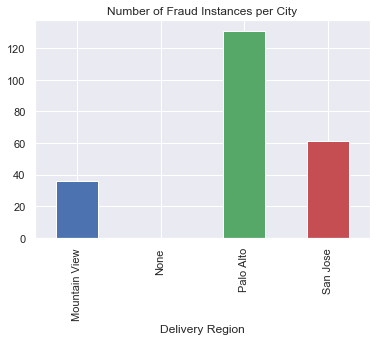

In [478]:
data.groupby(['Delivery Region'])['Possible_Fraud'].sum().plot(kind='bar',stacked=True)
plt.title('Number of Fraud Instances per City')
plt.show()

In [176]:
#NEW customer analysis, first time customer orders
round(data[data['Is New']==True].groupby(['Delivery Region']).agg({'Consumer ID': 'count','Total_Delivery_Time(mins)':'mean','Total_after_disc':'mean'
                                            ,'Amount of discount':'mean'}).sort_values(by='Consumer ID', ascending=False),2)

,Consumer ID,Total_Delivery_Time(mins),Total_after_disc,Amount of discount
Delivery Region,,,,
Palo Alto,2123,59.67,51.01,1.40
Mountain View,720,59.81,56.18,1.22
San Jose,666,56.18,41.74,2.22
None,3,787.20,593.98,0.00


In [174]:
city_grouped = data.groupby(['Delivery Region'])
city_grouped['Is New'].value_counts().unstack()

Is New,False,True
Delivery Region,,
Mountain View,3040,720
None,23,3
Palo Alto,9310,2123
San Jose,2193,666


In [126]:
round(100*city_grouped['Is New'].value_counts(normalize=True).unstack(),2)

Is New,False,True
Delivery Region,,
Mountain View,80.85,19.15
None,88.46,11.54
Palo Alto,81.43,18.57
San Jose,76.71,23.29


In [117]:
#City with the most repeat customers
'''Filter Dataframe for ONLY customers that have more than one order'''
only_cus_repeats= data[data['Consumer ID'].isin(data['Consumer ID'].value_counts()[data['Consumer ID'].value_counts()>1].index)]

only_cus_repeats.groupby(['Delivery Region']).agg({'Consumer ID': 'nunique'}).sort_values(by='Consumer ID', ascending=False)

,Consumer ID
Delivery Region,
Palo Alto,2069
Mountain View,705
San Jose,579
None,1


In [191]:
#Unique customers for Restaurants in each city
data.groupby(['Restaurant ID','Delivery Region']).agg({'Consumer ID': 'nunique'}).sort_values(by='Consumer ID', ascending=False).head(25)

,,Consumer ID
Restaurant ID,Delivery Region,
20,Palo Alto,515
9,Palo Alto,431
8,Palo Alto,401
107,Palo Alto,340
68,Palo Alto,310
12,Palo Alto,308
10,Palo Alto,276
63,Palo Alto,250
3,Palo Alto,199


In [190]:
#Total number of orders for Restaurants in each city
data.groupby(['Restaurant ID','Delivery Region']).agg({'Consumer ID': 'count'}).sort_values(by='Consumer ID', ascending=False).head(25)

,,Consumer ID
Restaurant ID,Delivery Region,
8,Palo Alto,744
20,Palo Alto,716
9,Palo Alto,713
107,Palo Alto,491
12,Palo Alto,472
68,Palo Alto,415
10,Palo Alto,381
63,Palo Alto,375
3,Palo Alto,266


In [189]:
data.groupby('Restaurant ID').agg({'Consumer ID': 'count'}).sort_values(by='Consumer ID', ascending=False).head(25)

,Consumer ID
Restaurant ID,
8,747
20,723
9,717
107,494
12,472
63,438
68,417
10,381
3,267


# Discounts Analysis

In [490]:
round(100*data[data['Amount of discount']>0]['Delivery Region'].value_counts(normalize=True),2)

Palo Alto        51.76
San Jose         30.16
Mountain View    18.08
Name: Delivery Region, dtype: float64

In [528]:
data.loc[data['Total_Delivery_Time(mins)'].idxmax()]

Customer placed order datetime           23 03:22:30
Placed order with restaurant datetime            NaN
Driver at restaurant datetime                    NaN
Delivered to consumer datetime           23 23:32:28
Driver ID                                         34
Restaurant ID                                     11
Consumer ID                                   113389
Is New                                         False
Delivery Region                            Palo Alto
Is ASAP                                        False
Order total                                   343.32
Amount of discount                                 0
Amount of tip                                     50
Refunded amount                                    0
Total_Delivery_Time(mins)                    1209.97
Total_after_disc                              343.32
is_new_counts                                      1
Possible_Fraud                                     0
Name: 16531, dtype: object

In [545]:
data.sort_values(by='Total_Delivery_Time(mins)', ascending=False).head(25)

,Customer placed order datetime,Placed order with restaurant datetime,Driver at restaurant datetime,Delivered to consumer datetime,Driver ID,Restaurant ID,Consumer ID,Is New,Delivery Region,Is ASAP,Order total,Amount of discount,Amount of tip,Refunded amount,Total_Delivery_Time(mins),Total_after_disc,is_new_counts,Possible_Fraud
16531,23 03:22:30,NaN,NaN,23 23:32:28,34,11,113389,False,Palo Alto,False,343.32,0.0,50.00,0.00,1209.966667,343.32,1.0,0
14965,09 01:16:00,09 17:24:22,09 20:01:42,09 20:23:44,286,63,88400,False,Palo Alto,False,190.35,6.0,16.40,0.00,1147.733333,184.35,2.0,1
12019,18 00:33:51,18 18:49:53,18 19:09:57,18 19:38:42,204,264,42240,True,Mountain View,False,66.79,6.0,2.79,0.00,1144.850000,60.79,1.0,0
6100,29 00:23:25,29 18:41:53,NaN,29 19:27:42,319,124,7466,True,Palo Alto,False,15.24,0.0,0.42,0.00,1144.283333,15.24,1.0,0
5536,04 00:00:18,04 18:04:33,04 18:22:27,04 18:59:41,125,96,6674,True,Palo Alto,False,102.24,0.0,4.42,0.00,1139.383333,102.24,1.0,0
13087,18 00:04:26,18 17:09:59,18 18:34:07,18 19:03:08,66,68,63262,True,Palo Alto,False,203.18,0.0,7.96,0.00,1138.700000,203.18,1.0,0
10235,05 00:53:54,05 18:10:07,05 18:45:31,05 19:17:48,69,27,14043,False,Palo Alto,False,160.12,0.0,6.81,0.00,1103.900000,160.12,3.0,0
12021,25 00:18:47,25 17:46:00,NaN,25 18:34:09,248,264,42240,False,Mountain View,False,82.13,0.0,3.50,0.00,1095.366667,82.13,1.0,0
2993,03 00:36:44,03 17:29:06,03 18:06:43,03 18:48:45,90,9,3000,False,Palo Alto,False,126.18,0.0,10.50,0.00,1092.016667,126.18,1.0,0
896,03 00:26:40,03 17:49:33,03 18:15:14,03 18:38:11,333,36,1011,False,Mountain View,False,136.40,0.0,17.16,0.00,1091.516667,136.40,3.0,0


In [182]:
data[data['Amount of discount']>0].groupby('Delivery Region')['Amount of discount'].describe()

,count,mean,std,min,25%,50%,75%,max
Delivery Region,,,,,,,,
Mountain View,504.0,7.841865,8.871630,0.19,6.0,6.0,6.0,121.36
Palo Alto,1443.0,10.482675,19.052321,1.00,6.0,6.0,6.0,187.88
San Jose,841.0,6.477693,3.946079,5.00,6.0,6.0,6.0,72.98


In [193]:
round(data[data['Amount of discount']>0].groupby(['Delivery Region']).agg({'Consumer ID': 'count','Total_after_disc':'mean'
                                            ,'Amount of discount':'mean'}).sort_values(by='Consumer ID', ascending=False),2)

,Consumer ID,Total_after_disc,Amount of discount
Delivery Region,,,
Palo Alto,1443,39.80,10.48
San Jose,841,37.45,6.48
Mountain View,504,39.98,7.84


In [509]:
# Avg Delivery time for orders WITH discounts vs WITHOUT
(round(data[data['Amount of discount'] >0]['Total_Delivery_Time(mins)'].mean(), 2), round(data[data['Amount of discount'] ==0]['Total_Delivery_Time(mins)'].mean(),2))

(57.18, 57.0)

In [533]:
cor_rel.loc[cor_rel['Total_Delivery_Time(mins)'].idxmin()]

Customer placed order datetime           21 06:13:32
Placed order with restaurant datetime    21 06:14:13
Driver at restaurant datetime                    NaN
Delivered to consumer datetime           21 06:14:00
Driver ID                                         25
Restaurant ID                                     20
Consumer ID                                     2032
Is New                                         False
Delivery Region                            Palo Alto
Is ASAP                                        False
Order total                                    14.08
Amount of discount                             14.08
Amount of tip                                      0
Refunded amount                                    0
Total_Delivery_Time(mins)                   0.466667
Total_after_disc                                   0
is_new_counts                                      1
Possible_Fraud                                     0
Name: 2028, dtype: object

In [511]:
# There is a very weak negative correlation between Total Delivery Time and the Amount of Discount Applied to Orders
data[data['Amount of discount'] >0][['Amount of discount','Total_Delivery_Time(mins)']].corr()

,Amount of discount,Total_Delivery_Time(mins)
Amount of discount,1.000000,-0.021475
Total_Delivery_Time(mins),-0.021475,1.000000


In [512]:
cor_rel = data[data['Amount of discount'] >0].copy()
cor_rel['Amount of discount']
cor_rel['Total_Delivery_Time(mins)']

In [517]:
cor_rel['Amount of discount'].corr(cor_rel['Total_Delivery_Time(mins)'])

-0.021475389785261815

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


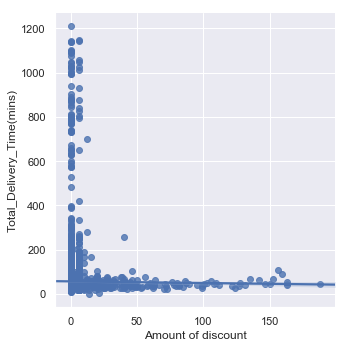

In [534]:
sns.lmplot(x='Amount of discount', y='Total_Delivery_Time(mins)', data=data)

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


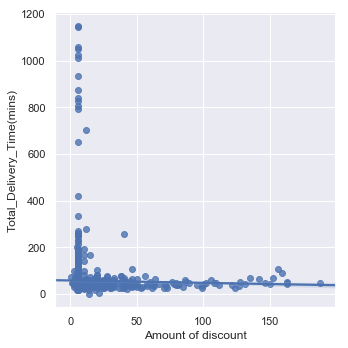

In [518]:
import seaborn as sns

sns.lmplot(x='Amount of discount', y='Total_Delivery_Time(mins)', data=cor_rel)

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


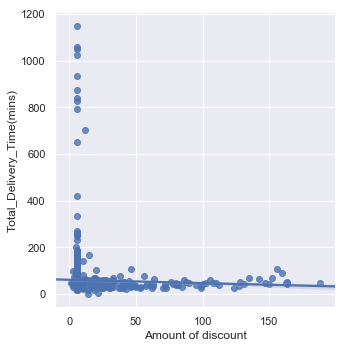

In [520]:
sns.lmplot(x='Amount of discount', y='Total_Delivery_Time(mins)', data=cor_rel[cor_rel['Delivery Region']=='Palo Alto'])

In [535]:
data[data['Amount of discount'] >0].groupby('Delivery Region').agg({'Amount of discount': ['count', 'mean', 'sum'], 'Total_Delivery_Time(mins)':'mean'}).reset_index()

Delivery Region Amount of discount                       \
                               count       mean       sum   
0   Mountain View                504   7.841865   3952.30   
1       Palo Alto               1443  10.482675  15126.50   
2        San Jose                841   6.477693   5447.74   

  Total_Delivery_Time(mins)  
                       mean  
0                 56.412256  
1                 59.562154  
2                 53.591547

# Conclusions/ Experimental Setup

From what I can glean, it's clear to see that Palo Alto is by far the most profitable market for DoorDash, it has the most customers (overall), the most repeat customers, the highest avg total order amount, the most popular restaurants (most # of orders & customers/top 12 are all from PA).

However, it does also have the longest average delivery team and the second lowest average discount amount for first time customer orders($1.40) after Mountain View($1.22). 
A deep dive into customer orders with discounts reveals that Palo Alto does have the highest average discount per order and the highest count of orders with discounts,
with more than 50% of all orders with discounts across all cities.

The main focus for promos such as free delivery and promo credits should be on Palo Alto, to take advantage of the strong/large customer base, and more importantly
for new customers making their first orders.

I would like to setup an experiment to track Customers who are abusing first-time order promo credits on a repeated basis. A simple Logistic Regression model can be implemented
to predict potential fradulent behavior from customers. I'm sure by now DoorDash has many safeguards and sophisticated models in place to mitigate against fradulent behavior,
I would genuinely love to be a part of that effort.

I am making the following assumptions for fradulent customer behavior:
- If a customer is categorized as a first time customer more than once then the customer has figured out a loophole for promo credits and is taking advantage of it.
- It is impossible to determine the the reason for the discounts being applied to orders with this data 
- I am assuming they're first time promo-credits considering that the avg delivery time for orders with & w/o discounts are the same (57 mins) and a very weak correlation between Delivery time and the amount of discount applied

For instance, consumer ID 514 has placed the most orders and has received $827.15 worth of discounts and has also been categorized as a new customer 12 times. 
Customers such as these have to be identified early to prevent them from racking up unearned free credits. The first step would be to create a watchlist for customers that
have been categorized as first-time customers more than once. 

Drawbacks:
The operational hazards that could occur from implementing such a solution are:
1.) Overhead- additional time spent by employees looking into specific customers and their fradulent activity.
2.) Inaccurate predictions
3.) Predictive Modeling Discrimination/Calibration

Success Metrics:
1.) Accuracy of the model's predictions
2.) Cost savings from preventing fraud (free credit)
3.) Model could help reveal loopholes in product offering/service

# Logistic Regression Model for Predicting Fradulent Customers

In [396]:
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [380]:
experiment = data.copy()
experiment.head(3)

,Customer placed order datetime,Placed order with restaurant datetime,Driver at restaurant datetime,Delivered to consumer datetime,Driver ID,Restaurant ID,Consumer ID,Is New,Delivery Region,Is ASAP,Order total,Amount of discount,Amount of tip,Refunded amount,Total_Delivery_Time(mins),Total_after_disc,is_new_counts,Possible_Fraud
0,14 20:27:45,14 20:29:41,14 20:39:32,14 20:52:03,86,12,5,False,Palo Alto,True,20.45,20.45,3.07,0.0,24.300000,0.0,1.0,0
1,07 20:16:28,07 20:17:32,07 20:36:00,07 20:49:02,325,66,5,False,Palo Alto,True,40.62,40.62,3.73,0.0,32.566667,0.0,1.0,0
2,13 19:35:09,13 19:39:26,13 20:28:16,13 20:52:44,200,124,5,False,Palo Alto,True,37.78,37.78,1.89,0.0,77.583333,0.0,1.0,0


In [410]:
data['Delivery Region'].value_counts()

Palo Alto        11433
Mountain View     3760
San Jose          2859
None                26
Name: Delivery Region, dtype: int64

In [392]:
experiment['Delivery Region'].value_counts()

2    11433
0     3760
3     2859
1       26
Name: Delivery Region, dtype: int64

In [386]:
X = experiment.select_dtypes(include=[object])
X= X[['Delivery Region']]

In [391]:
# 1. INSTANTIATE
# encode labels with value between 0 and n_classes-1.
le = preprocessing.LabelEncoder()

# 2/3. FIT AND TRANSFORM
# use df.apply() to apply le.fit_transform to all columns
X_2 = X.apply(le.fit_transform)
experiment.loc[:, 'Delivery Region'] = X_2.values

In [381]:
features = ['Is New','Delivery Region','Amount of discount','Refunded amount','Total_after_disc','is_new_counts']
target = 'Possible_Fraud'

In [ ]:
# For Is New: False will be 0, True will be 1
experiment['Is New'] = experiment['Is New'].map({'False':0, 'True':1}).astype(int)

experiment['Possible_Fraud'] = experiment['Possible_Fraud'].astype(int)

In [394]:
experiment['Possible_Fraud'].value_counts(normalize=True)

0    0.987388
1    0.012612
Name: Possible_Fraud, dtype: float64

In [395]:
X = experiment[features].values
y = experiment[target].values

In [397]:
exp_classifier_logreg = LogisticRegression(C=2)
exp_classifier_logreg.fit(X, y)

LogisticRegression(C=2, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [398]:
experiment['predictions_logreg'] = exp_classifier_logreg.predict(X)
confusion_matrix = pd.crosstab(experiment['predictions_logreg'], experiment['Possible_Fraud'])
confusion_matrix

Possible_Fraud,0,1
predictions_logreg,,
0,17842,161
1,8,67


In [400]:
ac = (confusion_matrix.loc[0,0] + confusion_matrix.loc[1,1])/experiment.shape[0]
print("Accuracy: {}".format(ac))

Accuracy: 0.9906516207545082


In [404]:
fraud_classifier_rf = RandomForestClassifier()
fraud_classifier_rf.fit(X,y)
experiment['predictions_rf'] = fraud_classifier_rf.predict(X)

In [405]:
confusion_matrix = pd.crosstab(experiment['predictions_rf'], experiment['Possible_Fraud'])
confusion_matrix

Possible_Fraud,0,1
predictions_rf,,
0,17850,0
1,0,228


In [407]:
ac = (confusion_matrix.loc[0,0] + confusion_matrix.loc[1,1])/experiment.shape[0]
print("Accuracy: {}".format(ac))

Accuracy: 1.0


In [430]:
features

['Is New',
 'Delivery Region',
 'Amount of discount',
 'Refunded amount',
 'Total_after_disc',
 'is_new_counts']

In [426]:
#Lets Introduce a New Customer Here
'''New Customer has the following entry '''

newcustomer= data[features].iloc[0].copy()
newcustomer['Is New']= True
newcustomer['Amount of discount']= 25
newcustomer['Refunded amount']= 0
newcustomer['Total_after_disc']= 1.50
newcustomer['is_new_counts']=5
newcustomer

Is New                     True
Delivery Region       Palo Alto
Amount of discount           25
Refunded amount               0
Total_after_disc            1.5
is_new_counts                 5
Name: 0, dtype: object

In [487]:
new_customer = np.array([[1, 2, 25, 0, 1.50, 5 ]])
prediction = fraud_classifier_rf.predict(new_customer)
print("The model predicts that the customer will be:")
if prediction == 1:
    print("Identified as Fraud\n.......Possible Fraud")
else:
    print("A normal Customer")
newcustomer['Possible_Fraud'] = prediction[0]
pd.DataFrame(newcustomer).T

The model predicts that the customer will be:
Identified as Fraud
.......Possible Fraud


,Is New,Delivery Region,Amount of discount,Refunded amount,Total_after_disc,is_new_counts,Possible_Fraud
0,True,Palo Alto,25,0,1.5,5,1


In [488]:
#Lets do it again
'''New Customer has the following entry '''

newcustomer= data[features].iloc[0].copy()
newcustomer['Is New']= True
newcustomer['Amount of discount']= 7
newcustomer['Refunded amount']= 0
newcustomer['Total_after_disc']= 11
newcustomer['is_new_counts']= 1
newcustomer

Is New                     True
Delivery Region       Palo Alto
Amount of discount            7
Refunded amount               0
Total_after_disc             11
is_new_counts                 1
Name: 0, dtype: object

In [489]:
new_customer = np.array([[1, 2, 7, 0, 11, 1 ]])
prediction = fraud_classifier_rf.predict(new_customer)
print("The model predicts that the customer will be:")
if prediction == 1:
    print("Identified as Fraud\n.......Possible Fraud")
else:
    print("A normal Customer")
newcustomer['Possible_Fraud'] = prediction[0]
pd.DataFrame(newcustomer).T

The model predicts that the customer will be:
A normal Customer


,Is New,Delivery Region,Amount of discount,Refunded amount,Total_after_disc,is_new_counts,Possible_Fraud
0,True,Palo Alto,7,0,11,1,0
